<a href="https://colab.research.google.com/github/Juanflpz/Clothes-Image-Classifier/blob/main/PEC3__2_ImageClassifier_JuanFelipeLopez_SamuelEcheverri_SantiagoMaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PEC3 - CONVOLUCIÓN Y CLASIFICACIÓN DE IMÁGENES

*   Samuel Echeverri Blandón
*   Juan Felipe López Castaño
*   Santiago Maya Cortés

##Definición de funciones e importación de librerías necesarias
En el siguiente código se definen las librerías a importar para el proceso y las 3 funciones que se utilizarán que son:


*   **download_image_from_gdrive:** Esta función descarga la imagen del link de Drive obtenido por parámetros usando gdown
*   **image_to_matrix:** Esta función obtiene la imagen y la convierte en una matriz de píxeles para luego ser procesada con convolución utilizando la función de cv2 imread
*   **apply_kernels:** Esta función es la que se encarga de aplicar los filtros definidos en los kernels a la imagen aplicando convolución a cada canal de color usando la función de cv2 filter2D para luego recombinar los canales y terminar el procesamiento

In [ ]:
import cv2
import numpy as np
import gdown
import matplotlib.pyplot as plt

# Descargar la imagen desde Google Drive usando gdown
def download_image_from_gdrive(url):
    file_id = url.split('/')[-2]
    download_url = f"https://drive.google.com/uc?id={file_id}"
    output = 'downloaded_image.jpg'
    gdown.download(download_url, output, quiet=False)
    return output

# Convertir la imagen en una matriz de píxeles
def image_to_matrix(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        raise Exception("No se pudo leer la imagen")
    return image

# Aplicar filtros de kernel a cada canal de la imagen
def apply_kernels(image_matrix, kernels):
    processed_images = []

    for kernel_name, kernel in kernels:
        print(f"Aplicando kernel: {kernel_name}")

        # Crear una matriz vacía para la imagen filtrada
        filtered_image = np.zeros_like(image_matrix)

        # Aplicar la convolución a cada canal de color (B, G, R)
        for channel in range(3):  # 0: Blue, 1: Green, 2: Red
            # Aplicar convolución utilizando cv2.filter2D
            filtered_image[:, :, channel] = cv2.filter2D(image_matrix[:, :, channel], -1, kernel)

        # Agregar la imagen filtrada a la lista de resultados
        processed_images.append(filtered_image)

    return processed_images

##Definición de kernels para la aplicación de filtros a la imagen

Se define cada filtro que se le aplica a la imagen cargada desde Google Drive para ver cómo se procesan en ella y en qué se diferencian, los cuales son:

*   **Afilado:** Realza los detalles de la imagen aumentando el contraste de los bordes.
*   **Detección de Bordes:** Resalta los bordes detectando cambios abruptos en la intensidad de los píxeles.
*   **Realce:** Crea un efecto de relieve, haciendo que los objetos parezcan más sobresalientes.
*   **Sobel en Eje X:** Detecta bordes verticales, resaltando líneas y bordes orientados horizontalmente.
*   **Sobel en Eje Y:** Detecta bordes horizontales, resaltando líneas y bordes orientados verticalmente.




In [ ]:
# Definir kernels
kernels = [
    ("Afilado", np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])),
    ("Detección de Bordes", np.array([[-1, -1, -1],
                                      [-1, 8, -1],
                                      [-1, -1, -1]])),
    ("Realce", np.array([[-2, -1, 0],
                         [-1, 1, 1],
                         [0, 1, 2]])),
    ("Sobel en Eje X", np.array([[-1, 0, 1],
                                 [-2, 0, 2],
                                 [-1, 0, 1]])),
    ("Sobel en Eje Y", np.array([[-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]]))
]

##Procesamiento de la imagen y muestra de resultados

Downloading...
From: https://drive.google.com/uc?id=1hOH-A3yIen84Oi5wlCaBE8QSfIvXZ7Qt
To: /content/downloaded_image.jpg
100%|██████████| 47.3k/47.3k [00:00<00:00, 65.0MB/s]


Aplicando kernel: Afilado
Aplicando kernel: Detección de Bordes
Aplicando kernel: Realce
Aplicando kernel: Sobel en Eje X
Aplicando kernel: Sobel en Eje Y


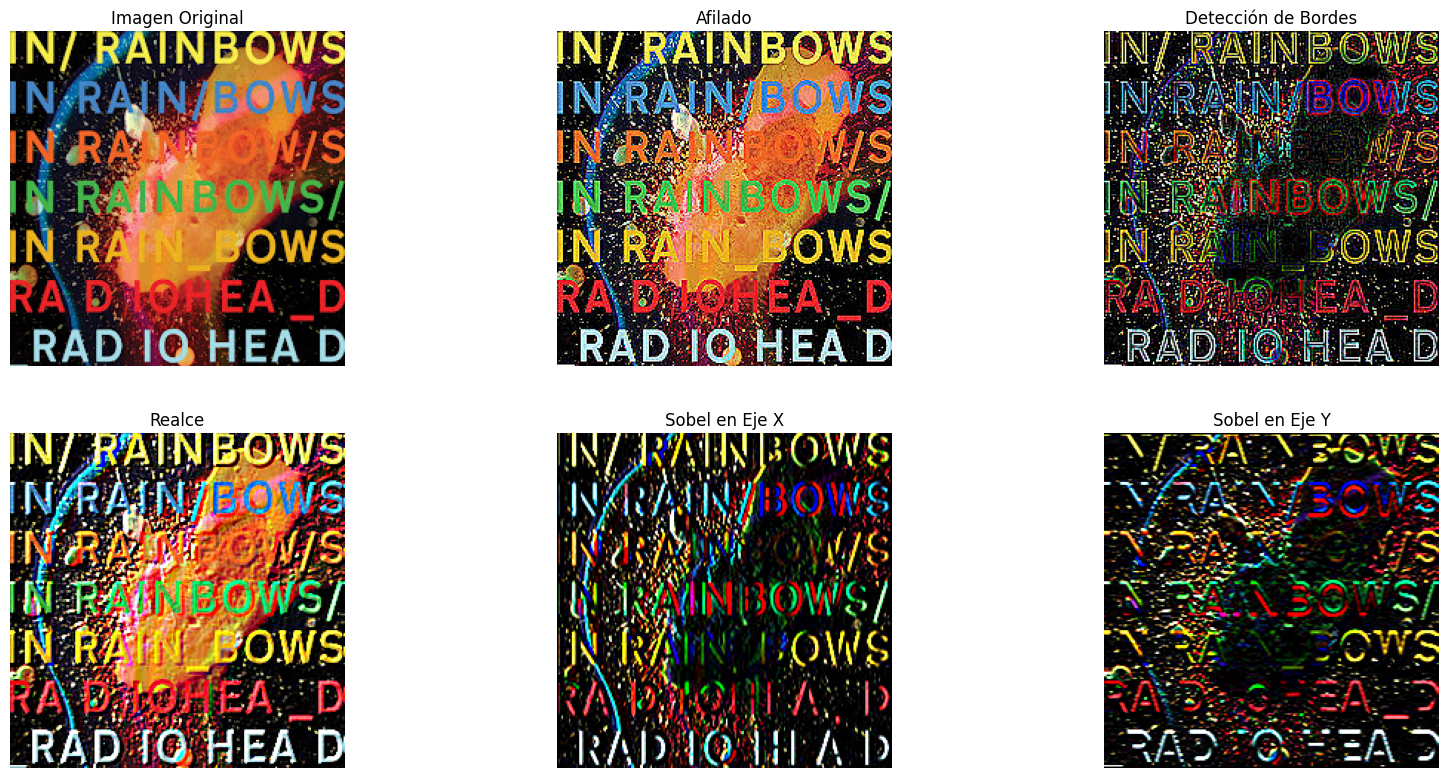

In [ ]:
# URL de la imagen en Google Drive
image_url = "https://drive.google.com/file/d/1hOH-A3yIen84Oi5wlCaBE8QSfIvXZ7Qt/view?usp=sharing"

# Proceso de descarga y procesamiento de la imagen
try:
    image_path = download_image_from_gdrive(image_url)
    image_matrix = image_to_matrix(image_path)

    # Aplicar kernels
    processed_images = apply_kernels(image_matrix, kernels)

    # Mostrar la imagen original y las imágenes procesadas
    plt.figure(figsize=(20, 20))

    plt.subplot(4, 3, 1)
    plt.imshow(cv2.cvtColor(image_matrix, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    for i, (name, kernel) in enumerate(kernels):
        plt.subplot(4, 3, i + 2)
        plt.imshow(cv2.cvtColor(processed_images[i], cv2.COLOR_BGR2RGB))
        plt.title(name)
        plt.axis('off')

    plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

#Clasificador de imágenes usando una red neuronal convolucional (CNN) de varias capas

Para este clasificador de imágenes se optó por escoger el dataset de imágenes de Zalando con imágenes de artículos de moda. Este dataset se utiliza comúnmente para benchmarking de algoritmos de aprendizaje automático. Siendo una alternativa al clásico dataset MNIST, el cual contiene dígitos escritos a mano, pero en su lugar, Fashion-MNIST contiene imágenes de ropa y accesorios, lo que presenta un desafío más realista y complejo para los modelos de visión por computadora.

**Características del Dataset:**

**Cantidad de Imágenes:**

*  *Conjunto de entrenamiento:* 60,000 ejemplos
*  *Conjunto de prueba:* 10,000 ejemplos


**Dimensiones de las Imágenes:** 28x28 píxeles

**Tipo de Imagen:** Escala de grises (grayscale)

**Etiquetas:** Cada imagen está asociada con una etiqueta que representa una de las 10 clases de artículos de moda (Camiseta/top, pantalón, suéter, vestido, abrigo, sandalia, camisa, zapatilla, bolso y botín)

**Entrenamiento:** 60,000 imágenes divididas en un único shard.

**Prueba:** 10,000 imágenes divididas en un único shard.

##Preprocesamiento del dataset

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math
import random

#Descargar set de datos de Fashion MNIST de Zalando
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#metadatos

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4AYXA6/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4AYXA6/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
#Obtenemos en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

#Etiquetas de las 10 categorias posibles
nombres_clases = metadatos.features['label'].names

nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Función de normalización para los datos (Pasar de 0-255 a 0-1)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Convertir de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento y pruebas
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a caché (usar memoria en lugar de disco para entrenar más rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

##Exploración del dataset

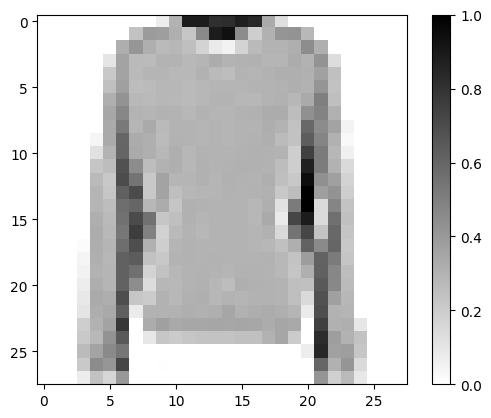

In [ ]:
#Mostrar una imagen de los datos de pruebas
for imagen, etiqueta in datos_entrenamiento.take(random.randint(1, 60000)):
  break
imagen = imagen.numpy().reshape((28,28))

#Dibujar una imagen aleatoria
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

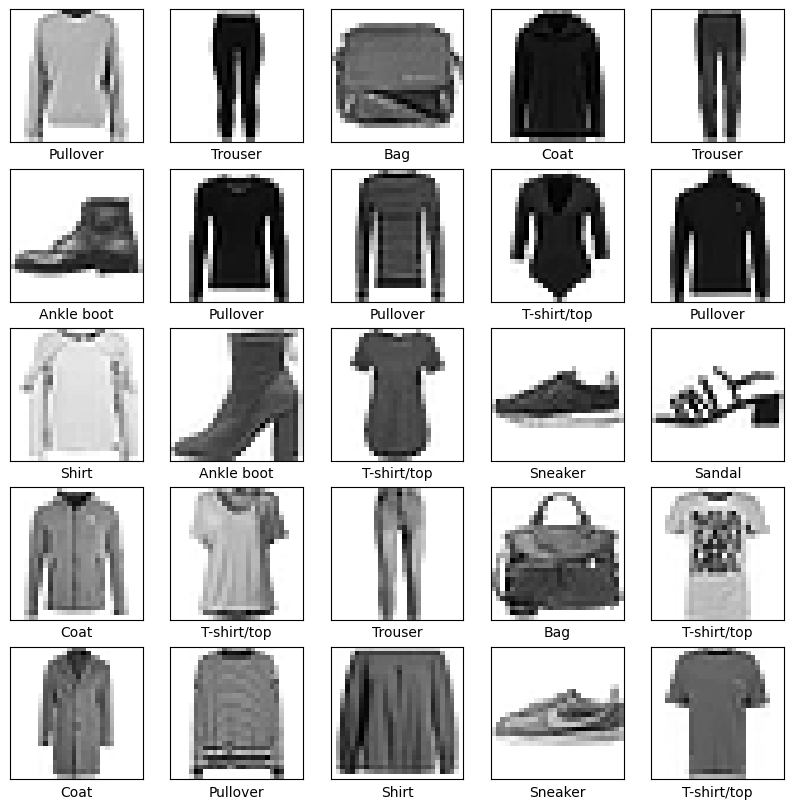

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

##Creación, compilación y entrenamiento del modelo

Este modelo se construye utilizando la API tf.keras.Sequential, que permite apilar capas de manera secuencial. El modelo consta de capas convolucionales, capas de pooling, capas de aplanado y capas densas.



*   La primer capa es la capa convolucional que aplica 32 filtros de 3x3 a cada imagen de entrada
*   Luego, la segunda capa es de maxpooling que reduce las dimensiones espaciales (altura y anchura) de la imagen aplicando un filtro de 2x2.
*   Se tiene una tercer capa también convolucional con la diferencia de que ésta aplica 64 filtros en lugar de 32
*   Después se tiene otra capa de maxpooling similar a la primera que reduce las dimensiones de la imagen a la mitad.
*   Posteriormente se tiene una capa de aplanado que aplana la entrada, transformando la matriz 2D en un vector 1D, que puede ser procesado por las capas densas.
*   Después se tiene una capa densa completamente conectada que contiene 64 neuronas
*   Finalmente se tiene una capa densa de salida completamente conectada con 10 neuronas, correspondiente a las 10 clases de salida. La cual tiene la función de activación softmax convierte las salidas en probabilidades, asegurando que la suma de las probabilidades sea 1. Esto es ideal para problemas de clasificación multiclase. El resto utilizan activación relu para introducir no linealidades en el modelo ayudando a aprender patrones más complejos.

En cuanto al compilado es un compilado normal con el optimizador alan y la función de pérdida SparseCategoricalCrossentropy que se utiliza para problemas de clasificación donde las etiquetas están en formato entero (no en one-hot encoding). Calculando la pérdida entre las etiquetas verdaderas y las predicciones del modelo.



In [ ]:
# Crear el modelo CNN
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
#Los numeros de datos en entrenamiento y pruebas (60k y 10k)
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [ ]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [ ]:
#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 100

datos_entrenamiento = datos_entrenamiento.shuffle(60000).batch(TAMANO_LOTE).prefetch(tf.data.experimental.AUTOTUNE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Entrenar el modelo
historial = modelo.fit(
    datos_entrenamiento,
    epochs=50,
    validation_data=datos_pruebas
)

Epoch 1/50
600/600 [==============================] - 15s 9ms/step - loss: 0.4901 - accuracy: 0.8246 - val_loss: 0.3588 - val_accuracy: 0.8718
Epoch 2/50
600/600 [==============================] - 3s 5ms/step - loss: 0.3157 - accuracy: 0.8874 - val_loss: 0.3127 - val_accuracy: 0.8897
Epoch 3/50
600/600 [==============================] - 3s 4ms/step - loss: 0.2714 - accuracy: 0.9020 - val_loss: 0.2882 - val_accuracy: 0.8956
Epoch 4/50
600/600 [==============================] - 3s 6ms/step - loss: 0.2436 - accuracy: 0.9111 - val_loss: 0.2859 - val_accuracy: 0.8970
Epoch 5/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2197 - accuracy: 0.9198 - val_loss: 0.2562 - val_accuracy: 0.9083
Epoch 6/50
600/600 [==============================] - 3s 4ms/step - loss: 0.2014 - accuracy: 0.9272 - val_loss: 0.2537 - val_accuracy: 0.9120
Epoch 7/50
600/600 [==============================] - 3s 4ms/step - loss: 0.1867 - accuracy: 0.9311 - val_loss: 0.2422 - val_accuracy: 0.9161
Epoch

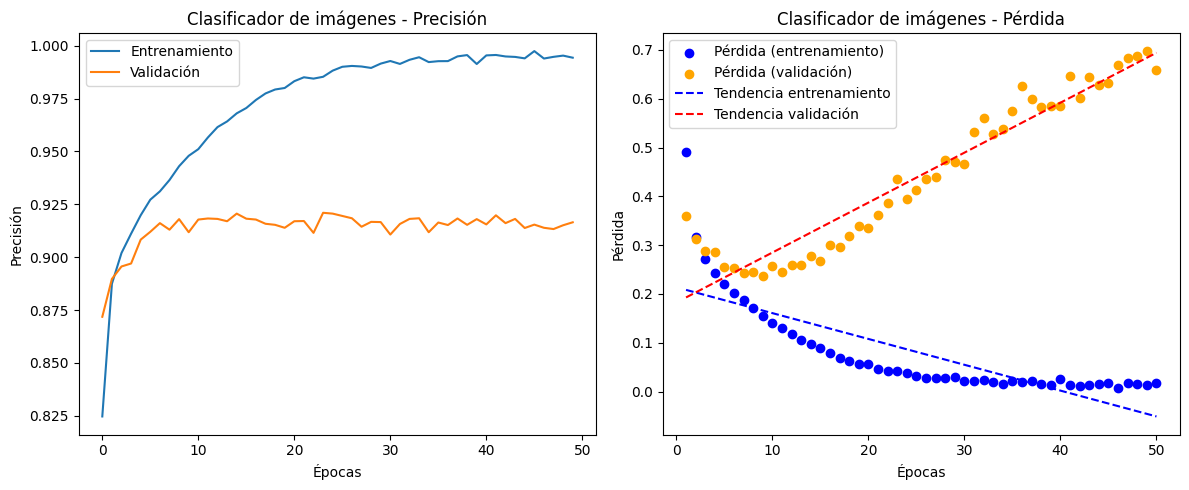

In [ ]:
# Función para graficar pérdida y precisión
def graficar_historial(history, title):
    # Crear una figura con dos subplots
    plt.figure(figsize=(12, 5))

    # Graficar la precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'{title} - Precisión')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Obtener el historial de la pérdida
    loss_history = history.history['loss']
    val_loss_history = history.history['val_loss']
    epochs = range(1, len(loss_history) + 1)

    # Graficar la pérdida con dispersión y línea de tendencia
    plt.subplot(1, 2, 2)
    plt.scatter(epochs, loss_history, label='Pérdida (entrenamiento)', color='blue')
    plt.scatter(epochs, val_loss_history, label='Pérdida (validación)', color='orange')

    # Línea de tendencia para la pérdida de entrenamiento
    z = np.polyfit(epochs, loss_history, 1)
    p = np.poly1d(z)
    plt.plot(epochs, p(epochs), "b--", label="Tendencia entrenamiento")

    # Línea de tendencia para la pérdida de validación
    z_val = np.polyfit(epochs, val_loss_history, 1)
    p_val = np.poly1d(z_val)
    plt.plot(epochs, p_val(epochs), "r--", label="Tendencia validación")

    plt.title(f'{title} - Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Mostrar los gráficos
graficar_historial(historial, "Clasificador de imágenes")

Al observar que a través de las épocas en cuanto al gráfico de precisión ésta mejora, y los datos de entrenamiento dan mejores accuracies a través de las épocas (desde la época 30 hasta la 50 rozando el 100%) que los de validación (desde la época 7 hasta la 50 rozando el 92,5%), y que en el gráfico de pérdida se ve que la línea de tendencia de los datos de entrenamiento disminuye (0.5 a 0.05 en 50 épocas) mientras que la línea de tendencia de los datos de validación aumenta (0.4 a 0.7 en 50 épocas), se pueden hacer varias conclusiones sobre el comportamiento y el rendimiento de la red:

**Overfitting:**
*   ***Precisión:*** La red neuronal muestra una precisión en los datos de entrenamiento que se aproxima al 100%, mientras que la precisión en los datos de validación se estabiliza en torno al 92.5%. Esta diferencia indica que el modelo está aprendiendo muy bien los patrones presentes en los datos de entrenamiento, pero no generaliza bien a datos nuevos (de validación), aunque sigue dando muy buenos resultados para los datos de validación.
*   ***Pérdida:*** La pérdida en los datos de entrenamiento disminuye constantemente, lo que también sugiere que el modelo está ajustándose cada vez mejor a los datos de entrenamiento. Sin embargo, el aumento de la pérdida en los datos de validación a lo largo del tiempo es un claro indicativo de sobreajuste. El modelo empieza a memorizar los datos de entrenamiento en lugar de aprender características generales que podrían aplicarse a nuevos datos.


**Capacidad del Modelo:**
La diferencia en la precisión y pérdida entre los datos de entrenamiento y validación sugiere que el modelo tiene una alta capacidad y complejidad. Esto le permite aprender hasta los detalles más pequeños del conjunto de entrenamiento, pero algunos de estos detalles no son representativos de los datos de validación, lo que lleva a un rendimiento no tan positivo en generalización.

En resumen, la observación de los gráficos indica que la red neuronal está sufriendo de sobreajuste, donde se adapta demasiado bien a los datos de entrenamiento pero no logra generalizar tan bien a datos nuevos. Para mejorar el rendimiento en los datos de validación, sería recomendable aplicar técnicas de regularización, simplificar el modelo o aumentar el conjunto de datos de entrenamiento (data augmentation) en versiones futuras de la CNN.

##Clasificación de imágenes

4/4 [==============================] - 0s 3ms/step


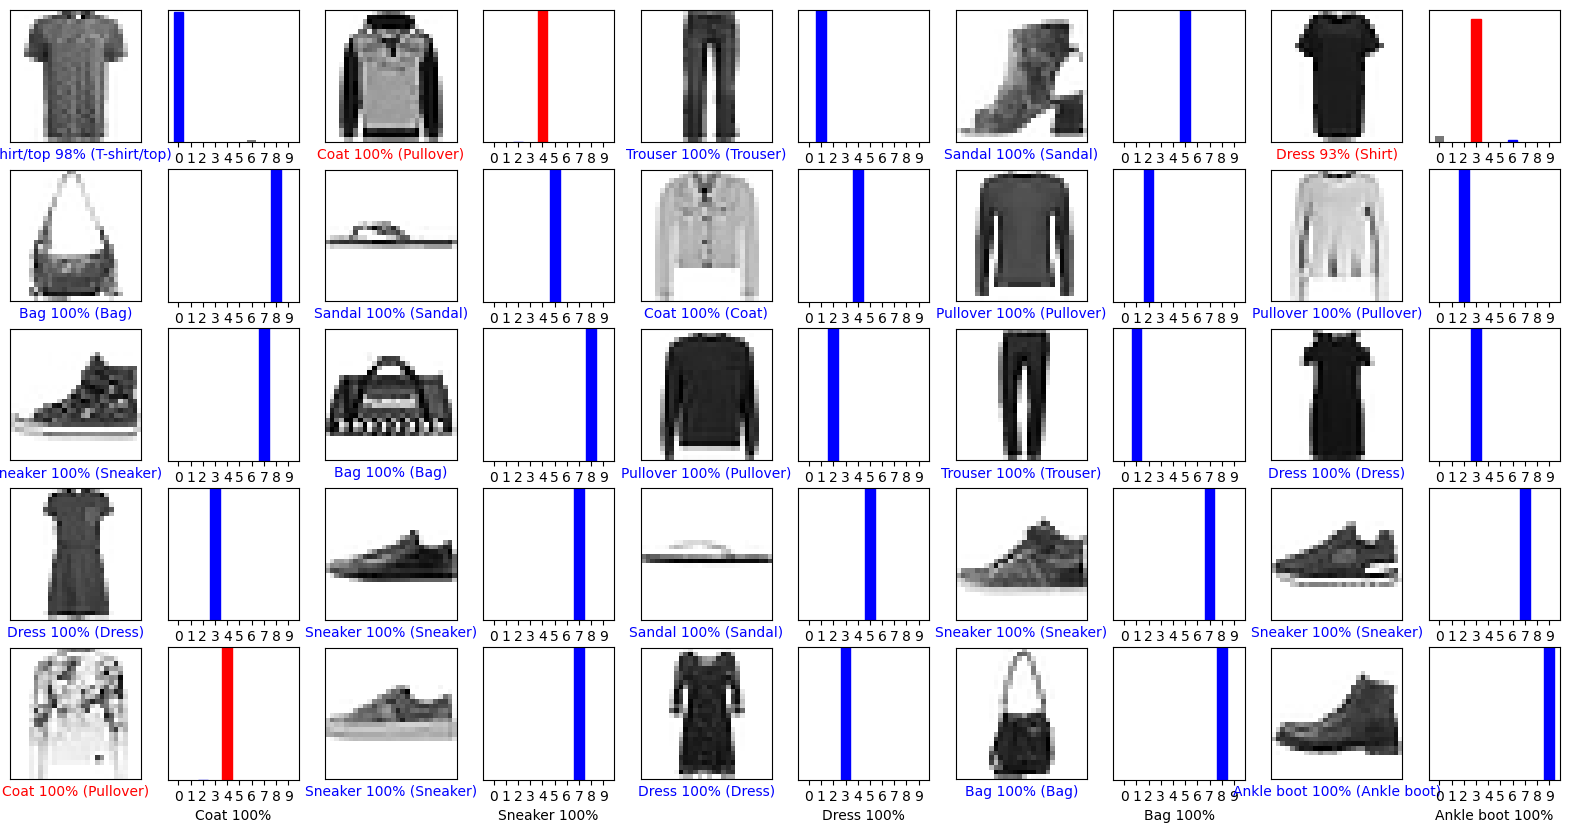

In [ ]:
# Definir las etiquetas de las clases
nombres_clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(4):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

#Grafica una imagen específica junto con la etiqueta predicha y la etiqueta real.
#Si la predicción es correcta, el texto será azul. Si no, rojo.
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    color = 'blue' if etiqueta_prediccion == etiqueta_real else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                          100 * np.max(arr_predicciones),
                                          nombres_clases[etiqueta_real]),
                                          color=color)

#Grafica un gráfico de barras que muestra las probabilidades predichas para cada clase.
#La barra correspondiente a la etiqueta predicha se coloreará de rojo, y la barra correspondiente a la etiqueta real de azul.
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0, 1])
    etiqueta_prediccion = np.argmax(arr_predicciones)
    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')
    plt.xlabel("{} {:2.0f}%".format(nombres_clases[etiqueta_prediccion],
                                    100 * np.max(arr_predicciones)))

# Configurar el número de filas y columnas para la visualización 10x10
filas, columnas = 5, 5
num_imagenes = filas * columnas

plt.figure(figsize=(2 * 2 * columnas, 2 * filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2 * columnas, 2 * i + 1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2 * columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

plt.show()

**Pautas para entender el gráfico:**

Es importante explicar cómo funciona el gráfico anterior para que el lector lo pueda entender con facilidad:


*   Este gráfico expone el resultado de 25 muestras de las 10000 que hacen parte del dataset de validación clasificándolas según la categoría a la que pertenecen. Para cada imagen muestra en el label la categoría predicha por el modelo, seguida por el porcentaje de predicción, seguidos por la etiqueta real de la imagen encerrada entre paréntesis.
*   En cuanto a los diagramas de barras cada uno de ellos tiene 10 barras que hacen alusión a las 10 posibles etiquetas que pueda tener el dataset (Camiseta/top, pantalón, suéter, vestido, abrigo, sandalia, camisa, zapatilla, bolso y botín), y se pintan de color azul la barra correspondiente a la clase y de color rojo la barra predicha que no sea la de la clase siempre y cuando tenga un mayor porcentaje que la barra correspondiente a la de la clase real. Mientras que otros valores predichos que no son los de la clase pero tampoco están pintados de rojo se pintarán de grisaceo (para observarlo pon el número **2** en la sexta línea de código de la casilla anterior en el parámetro de la función y verás cómo varios gráficos tienen barras grises)

**Observación del gráfico:**

En el gráfico anterior se puede observar la predicción del modelo para los datos de validación tomados para hacer la clasificación (25). En él se observa que la red neuronal convolucional (CNN) sirve muy bien para identificar la mayoría de imágenes. Pero para estos 25 datos el 12% de ellos no logra clasificarlos bien.


##Clasificación de imágenes de internet (diferentes a las del dataset)

1/1 [==============================] - 0s 28ms/step


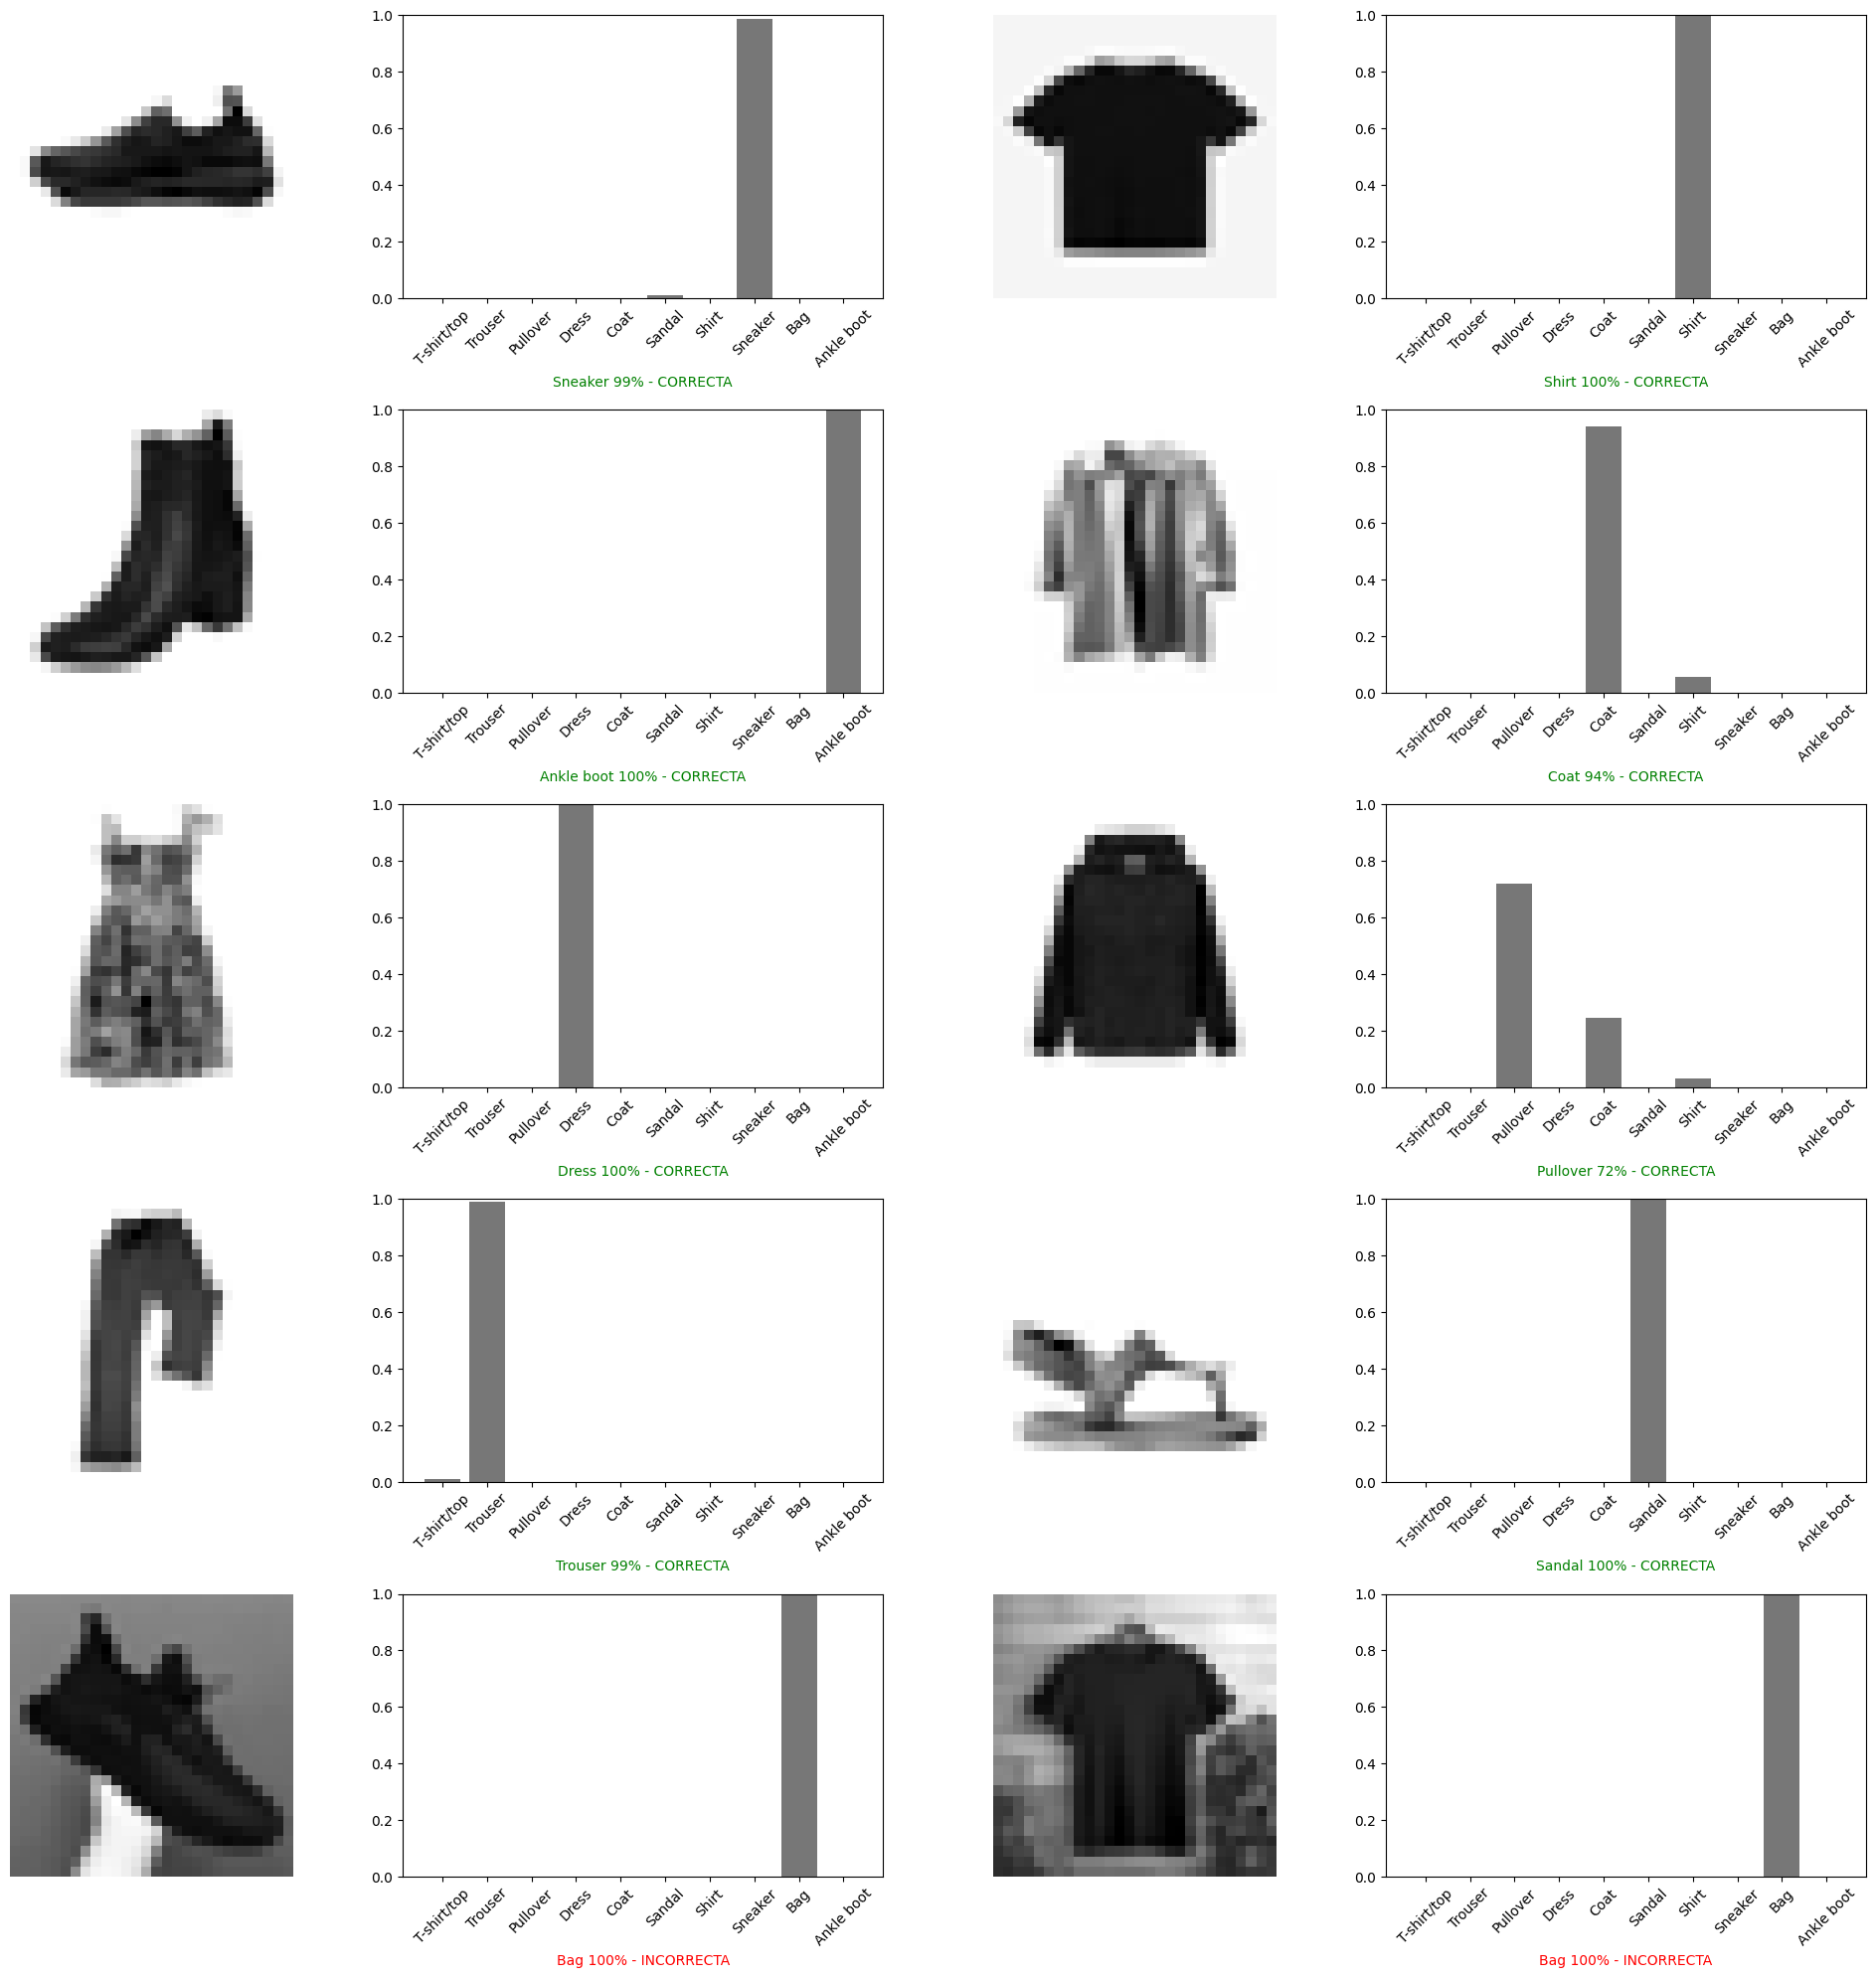

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
import io

# Función para clasificar una imagen obtenida de internet
def clasificar_imagen_url(url_imagen, etiqueta_real):
    # Descargar la imagen desde la URL
    response = requests.get(url_imagen)
    imagen = Image.open(io.BytesIO(response.content)).convert('L')  # Convertir a escala de grises
    imagen = imagen.resize((28, 28))  # Redimensionar a 28x28

    # Invertir los colores (blanco a negro y negro a blanco)
    imagen = Image.fromarray(np.uint8(255 - np.array(imagen)))

    imagen_np = np.array(imagen)  # Convertir a array numpy
    imagen_np = imagen_np / 255.0  # Normalizar

    # Añadir una dimensión para que coincida con el formato esperado por el modelo (batch_size, 28, 28, 1)
    imagen_np = np.expand_dims(imagen_np, axis=0)
    imagen_np = np.expand_dims(imagen_np, axis=-1)

    # Realizar la predicción
    prediccion = modelo.predict(imagen_np)

    # Obtener la etiqueta predicha
    etiqueta_predicha = np.argmax(prediccion)

    return imagen, prediccion

urls_imagenes = [
    ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTz_JJCGBhQiGcyXvUzXY9PiQtXhp1gCgDw0lu_svb0-A&s', 7),
    ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_HUpK4hrBobqWedSXEhvva4u8qX_k_31fZcihRT2HEw&s', 6),
    ('https://calzatodocol.vteximg.com.br/arquivos/ids/211430-292-292/231001484_negro_02.jpg?v=638347644224430000', 9),
    ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR26s1gD4wWF95nL-iFJndYoZA-_dLun9BHnV8A3cNhIg&s', 4),
    ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQR65C_yo7RWqCCGxL9AkLeqailh4V7SGzas3Z-1uwniw&s', 3),
    ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRdBenxsTG72rDb6LNRBdwPM8FbEzGjyeGyMlAaZ5vutQ&s', 2),
    ('https://chedrauimx.vtexassets.com/arquivos/ids/30174261-800-auto?v=638506200353700000&width=800&height=auto&aspect=true', 1),
    ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSk8V-vibW88ZBa0ZCAyZyHczHkO-q6Q3xhnBOvPFz63w&s', 5),
    ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfxNWFpzbU2YSJhUxE13s2cZcqBhNO_a4acyaIHAnWnQ&s', 7),
    ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmhANHGtPWrHZCyALlipHDqfEXyiU5E9vcuAU4cah2tg&s', 6)
]

# Preparar la figura para mostrar todas las imágenes y predicciones
plt.figure(figsize=(20, 20))

# Iterar sobre las URLs de las imágenes
for i, (url, etiqueta_real) in enumerate(urls_imagenes[:10]):  # Tomar solo las primeras 10 imágenes
    # Obtener la imagen y la predicción
    imagen, prediccion = clasificar_imagen_url(url, etiqueta_real)

    # Realizar la predicción
    etiqueta_predicha = np.argmax(prediccion)

    # Comparar etiqueta predicha con etiqueta real
    if etiqueta_predicha == etiqueta_real:
        texto_prediccion = "{} {:2.0f}% - CORRECTA".format(nombres_clases[etiqueta_predicha], 100 * np.max(prediccion))
        color_texto = 'green'
    else:
        texto_prediccion = "{} {:2.0f}% - INCORRECTA".format(nombres_clases[etiqueta_predicha], 100 * np.max(prediccion))
        color_texto = 'red'

    # Mostrar la imagen y la predicción en una subfigura
    plt.subplot(5, 4, 2*i + 1)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.axis('off')

    plt.subplot(5, 4, 2*i + 2)
    plt.bar(range(10), prediccion[0], color="#777777")
    plt.ylim([0, 1])
    plt.xlabel(texto_prediccion, color=color_texto)
    plt.xticks(range(10), nombres_clases, rotation=45)

# Mostrar la figura completa con todas las imágenes y sus predicciones
plt.tight_layout()
plt.show()

Para el resultado anterior con las imágenes de internet se observa que la red neuronal es capaz de clasificar con buena precisión la mayoría de las imágenes, peor presenta problemas graves al clasificar imágenes que no tienen un fondo mucho más blanco que el elemento a identificar, siendo ejemplo de ello las últimas dos imágenes, además de que el ruido en la imagen (elementos extras) afecta totalmente al rendimiento de la clasificación y así que la CNN no pueda identificar nada de la imagen.

Ahora bien, las imágenes que están mal clasificadas se clasifican como bolsos, y ésto se debe a que como se ve en la siguiente imagen de la matriz de confusión los elementos que más identifica la red son bolsos (bag) y por tanto se concluye que cuando la red no es capaz de identificar el elemento de la imagen lo clasifica como un bolso, ya que la red neuronal requiere de que el resultado haga parte de una de las diez salidas que representan cada label al que puede pertenecer la imagen.

4/4 [==============================] - 0s 3ms/step


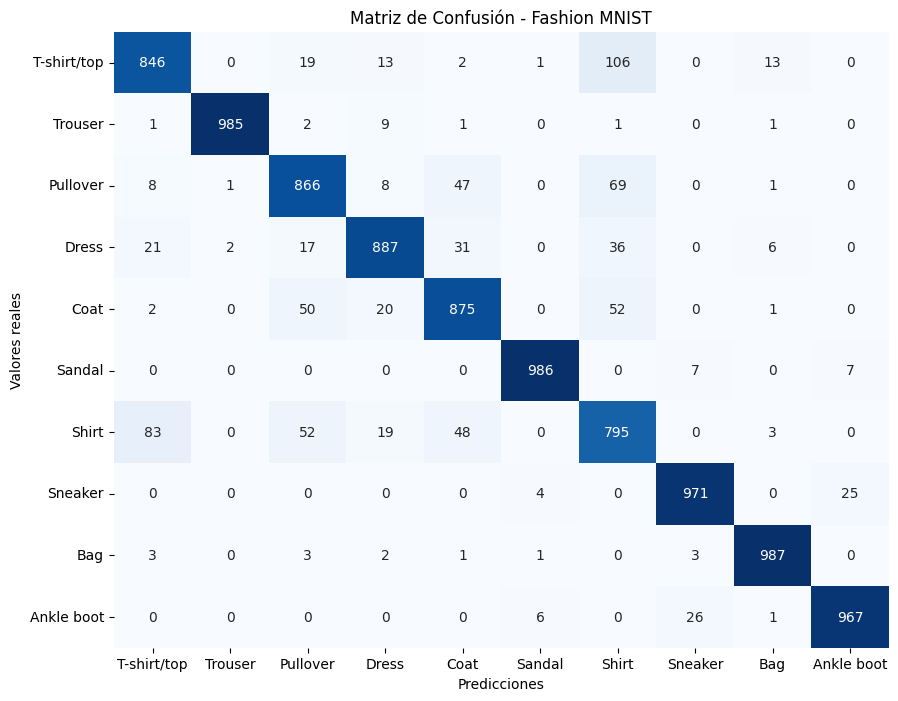

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns  # Importar seaborn para el heatmap

# Evaluar el modelo en el conjunto de pruebas y obtener el reporte de clasificación y la matriz de confusión
etiquetas_prueba = []
predicciones = []

for imagenes_prueba, etiquetas_prueba_batch in datos_pruebas:
    etiquetas_prueba.append(etiquetas_prueba_batch.numpy())
    predicciones.append(np.argmax(modelo.predict(imagenes_prueba), axis=-1))

etiquetas_prueba = np.concatenate(etiquetas_prueba)
predicciones = np.concatenate(predicciones)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(etiquetas_prueba, predicciones)

# Crear un DataFrame de Pandas para mostrar la matriz de confusión
conf_mat_df = pd.DataFrame(conf_mat, index=nombres_clases, columns=nombres_clases)

# Crear un heatmap (mapa de calor) con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Fashion MNIST')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.yticks(rotation=0)
plt.show()

# Conclusiones

Se concluye que el modelo de red neuronal convolucional (CNN) construida para el dataset de Fashion/MNIST desarrollado por Zalando tiene una buena precisión para predecir y clasificar los tipos de prenda contemplados en él, pero no es del todo certera ya que como se observó en el entrenamiento del modelo y las gráficas de pérdidas y precisión comparando a los datos de entrenamiento vs los datos de prueba esta red presenta problemas de overfitting (se ajusta muy bien a los datos de entrenamiento aprendiendo valores muy específicos del entrenamiento que a la hora de agregar datos nuevos no son útiles para la clasificación, resultando en datos erróneos) por lo cual puede beneficiarse de aplicar técnicas de regularización como dropout, regularización L2, o early stopping para próximas ediciones siendo a nuestro parecer early stopping de las menos plausibles ya que se observa en las líneas de tendencia de ambos gráficos que la línea de tendencia de la validación no se cruza en ningún momento sobrepasando a la de entrenamiento de manera drástica. Al igual que también se puede simplificar el modelo reduciendo neuronas y capas haciéndolo menos propenso a memorizar los datos de entrenamiento.

Mediante el testeo del clasificador con los datos de prueba observamos en la matriz de confusión que ciertos valores tienen mayor predilección a ser identificados. Éstos no varían tanto, pero entre el menor y mayor hay una diferencia de aproximadamente 20%, mientras que los otros tienen una predilección entre media y alta dentro de ese rango que comprenden el de mayor y menor predilección.

La red neuronal funciona bien para clasificar imágenes dentro de las categorías que admite siendo éstas obtenidas dentro o fuera del dataset, aunque se tiene que tener precaución con que las imágenes no tengan mucho ruido y cumplan con que el elemento se diferencie del fondo. Sería recomendable añadir más valores variados dentro de los datos de entrenamiento, para que así pueda identificar imágenes diferentes. Es importante recalcar también que la red presenta signos de que la convolución fue exitosa, siendo que no importa la dirección del elemento para su clasificación como se puede ver con la sandalia dentro de los elementos obtenidos por internet, demostrando que es una red útil para realizar tareas de clasificación de este tipo a pesar de sus limitaciones descritas anteriormente.